# **FIRST DATA (Variety of Public Transport in Jakarta per Month In 2024)**

##  **Date Grouping with SQL (Big Query)**

In [ ]:
SELECT
  periode_data,
  CASE
    WHEN periode_data = 202401 THEN 'Januari'
    WHEN periode_data = 202402 THEN 'Februari'
    WHEN periode_data = 202403 THEN 'Maret'
    WHEN periode_data = 202404 THEN 'April'
    WHEN periode_data = 202405 THEN 'Mei'
    WHEN periode_data = 202406 THEN 'Juni'
    WHEN periode_data = 202407 THEN 'Juli'
    WHEN periode_data = 202408 THEN 'Agustus'
    WHEN periode_data = 202409 THEN 'September'
    WHEN periode_data = 202410 THEN 'Oktober'
    WHEN periode_data = 202411 THEN 'November'
    ELSE 'Desember'
  END AS bulan,
  jenis_moda,
  SUM(jumlah_penumpang_per_hari) AS total_penumpang
FROM `porto.transport`
WHERE tanggal < '2025-01-01'
GROUP BY periode_data, jenis_moda
ORDER BY periode_data, jenis_moda

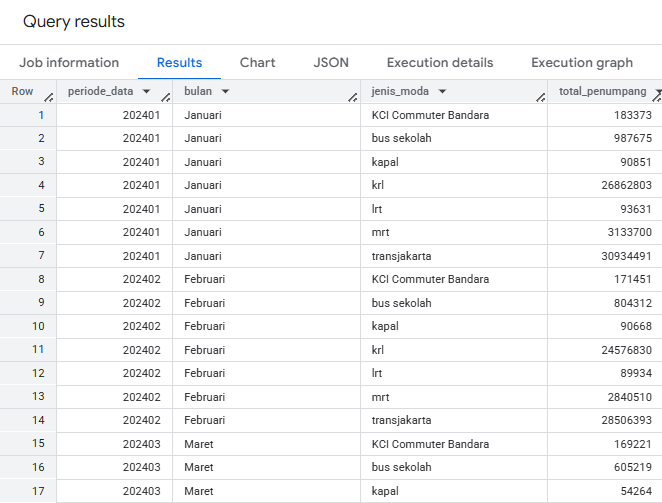

## **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preparation**

### Import Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/test/Public_Transport_Usage_Jakarta_2024.csv')
df

,periode_data,bulan,jenis_moda,total_penumpang
0,202401,Januari,KCI Commuter Bandara,183373
1,202401,Januari,bus sekolah,987675
2,202401,Januari,kapal,90851
3,202401,Januari,krl,26862803
4,202401,Januari,lrt,93631
...,...,...,...,...
79,202412,Desember,kapal,57299
80,202412,Desember,krl,25710234
81,202412,Desember,lrt,101209
82,202412,Desember,mrt,3591046


### Data Cleaning

In [4]:
bulan_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

df['bulan'] = pd.Categorical(df['bulan'], categories=bulan_order, ordered=True)

Make every month in order

### Inspect Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   periode_data     84 non-null     int64   
 1   bulan            84 non-null     category
 2   jenis_moda       84 non-null     object  
 3   total_penumpang  84 non-null     int64   
dtypes: category(1), int64(2), object(1)
memory usage: 2.6+ KB


In [ ]:
df.isnull().sum()

,0
periode_data,0
bulan,0
jenis_moda,0
total_penumpang,0


Data already clean with 0 NULL and right Dtype

### Check For Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

Data doesn't have any duplicate

### Check For Outliers With Botplot

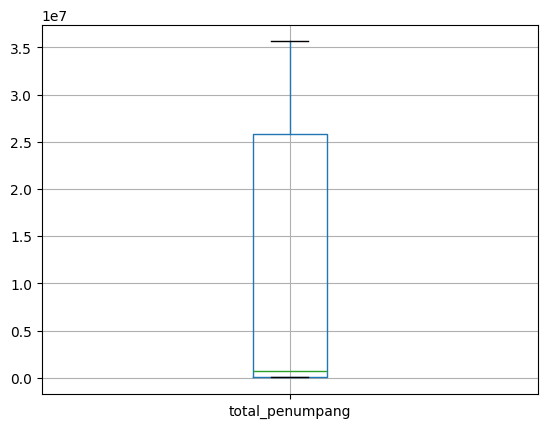

In [ ]:
df.boxplot(column=['total_penumpang'])
plt.show()

There is **no outlier** in total_penumpang data. This data has a big range from 0 Million to 35 Million. The distribution of this data is **skewed**

### Final Check

In [ ]:
display(df)
df.info()

,periode_data,bulan,jenis_moda,total_penumpang
0,202401,Januari,KCI Commuter Bandara,183373
1,202401,Januari,bus sekolah,987675
2,202401,Januari,kapal,90851
3,202401,Januari,krl,26862803
4,202401,Januari,lrt,93631
...,...,...,...,...
79,202412,Desember,kapal,57299
80,202412,Desember,krl,25710234
81,202412,Desember,lrt,101209
82,202412,Desember,mrt,3591046


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   periode_data     84 non-null     int64   
 1   bulan            84 non-null     category
 2   jenis_moda       84 non-null     object  
 3   total_penumpang  84 non-null     int64   
dtypes: category(1), int64(2), object(1)
memory usage: 2.6+ KB


### Summarize Data

Descriptive statistics for numerical data

In [ ]:
df.describe()

,periode_data,total_penumpang
count,84.000000,8.400000e+01
mean,202406.500000,9.056688e+06
std,3.472786,1.314004e+07
min,202401.000000,5.426400e+04
25%,202403.750000,1.280478e+05
50%,202406.500000,7.730955e+05
75%,202409.250000,2.578317e+07
max,202412.000000,3.564648e+07


Descriptive statistics for non-numerical data

In [ ]:
df.describe(include='object')

,jenis_moda
count,84
unique,7
top,KCI Commuter Bandara
freq,12


Count unique values in **jenis_moda**

In [ ]:
df['jenis_moda'].value_counts()

,count
jenis_moda,
KCI Commuter Bandara,12
bus sekolah,12
kapal,12
krl,12
lrt,12
mrt,12
transjakarta,12


Count unique values in **bulan**

In [ ]:
df['bulan'].value_counts()

,count
bulan,
Januari,7
Februari,7
Maret,7
April,7
Mei,7
Juni,7
Juli,7
Agustus,7
September,7


### Export Data

In [ ]:
df.to_csv('variety_transport_usage_in_jakarta_2024.csv', index=False)

In [ ]:
from google.colab import files
files.download('variety_transport_usage_in_jakarta_2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Exploratory Data Analysis**

### Bar Chart

Using bar chart to show the most popular transportation type (total and per month)



#### Per Month

In [ ]:
popular_transportation_per_month = pd.pivot_table(
    df,
    index=['jenis_moda','bulan'],
    values='total_penumpang',
    aggfunc='sum'
)
popular_transportation_per_month

total_penumpang
jenis_moda           bulan                     
KCI Commuter Bandara Agustus             193737
                     April               205338
                     Desember            168398
                     Februari            171451
                     Januari             183373
...                                         ...
transjakarta         Maret             30085836
                     Mei               32022325
                     November          32207257
                     Oktober           35646480
                     September         32394170

[84 rows x 1 columns]

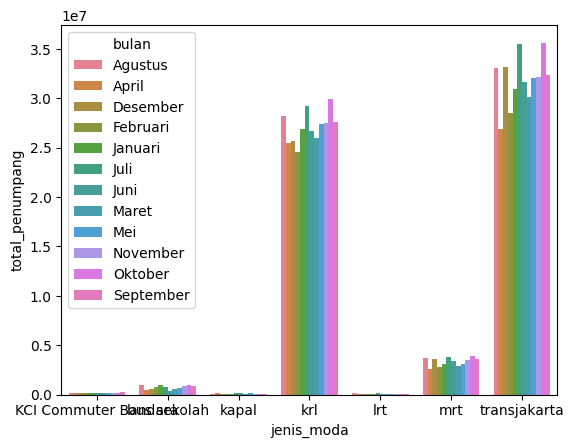

In [ ]:
sns.barplot(data=popular_transportation_per_month, x='jenis_moda', y='total_penumpang', hue='bulan')
plt.show()

#### Total

In [ ]:
popular_transportation = pd.pivot_table(
    df,
    index='jenis_moda',
    values='total_penumpang',
    aggfunc='sum'
).sort_values('total_penumpang', ascending=False)

<Axes: xlabel='jenis_moda'>

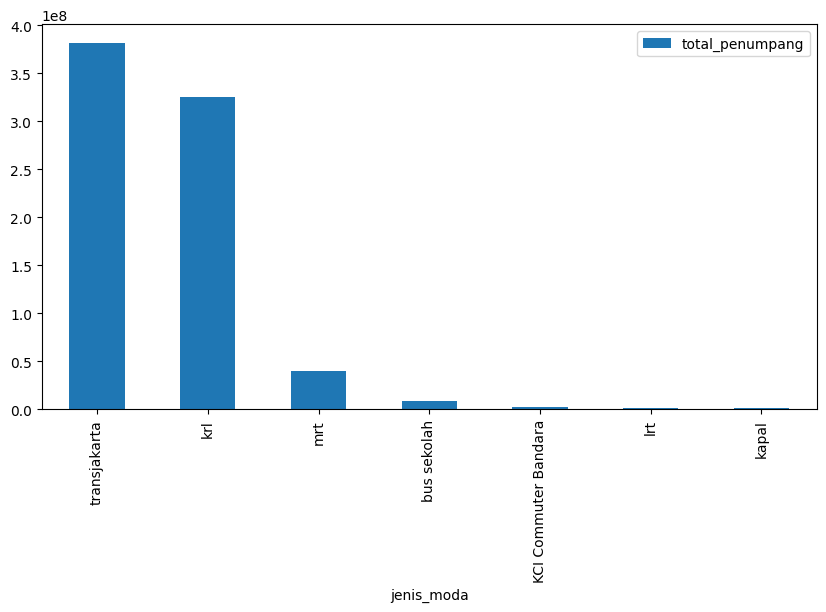

In [ ]:
popular_transportation.plot(kind='bar', figsize=(10, 5))

### Displot

Using displot chart to show the distribution transportation type in total

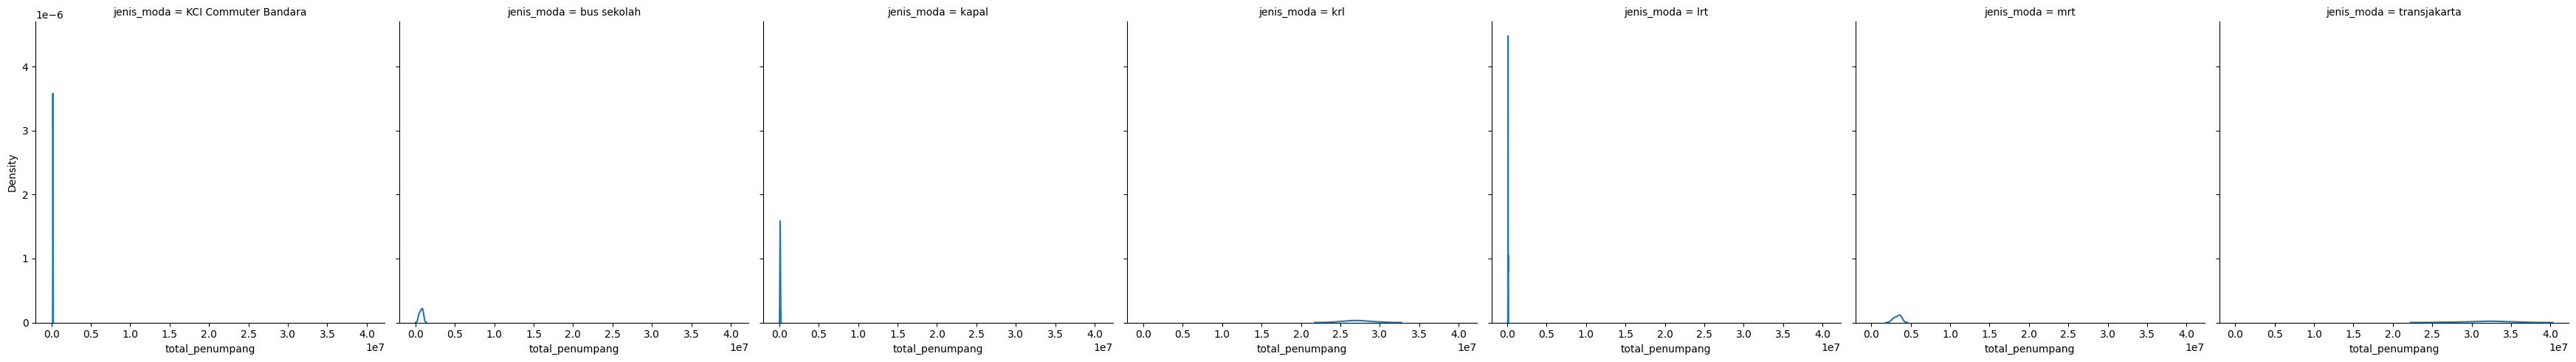

In [ ]:
sns.displot(data = df, x='total_penumpang', col='jenis_moda', kind='kde')
plt.show()

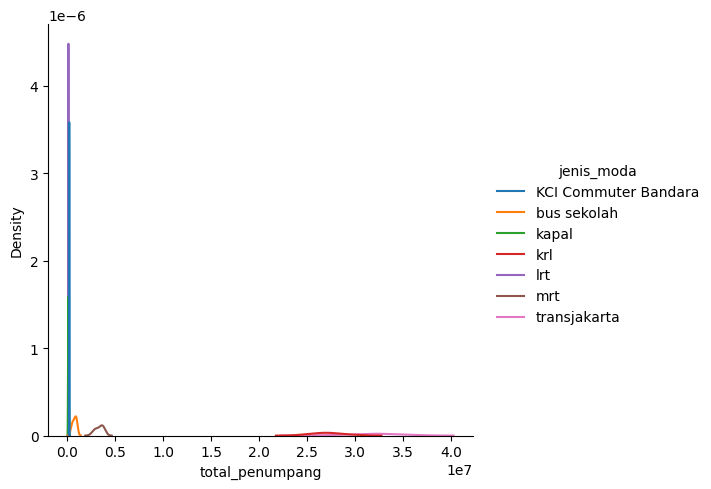

In [ ]:
sns.displot(data = df, x='total_penumpang', hue='jenis_moda', kind='kde')
plt.show()

### Heat Map

In [31]:
data = pd.pivot_table(
    data=df,
    index='jenis_moda',
    columns='bulan',
    values='total_penumpang',
    aggfunc='sum'
)
data

<ipython-input-31-be0d59541c3d>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data = pd.pivot_table(


bulan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
jenis_moda,,,,,,,,,,,,
KCI Commuter Bandara,183373,171451,169221,205338,184671,182941,192645,193737,212641,186407,174336,168398
bus sekolah,987675,804312,605219,431820,652680,399663,741879,997820,852979,956328,852518,525141
kapal,90851,90668,54264,166280,126016,124330,116079,104666,103340,76534,77369,57299
krl,26862803,24576830,26001988,25505204,27367753,26739475,29206932,28209145,27607986,29933211,27522242,25710234
lrt,93631,89934,92004,84571,96288,102835,132456,128725,96628,101848,92855,101209
mrt,3133700,2840510,2876356,2607904,3101157,3399812,3784237,3738973,3556484,3865580,3514641,3591046
transjakarta,30934491,28506393,30085836,26901324,32022325,31617767,35503341,33113022,32394170,35646480,32207257,33141311


<Axes: xlabel='bulan', ylabel='jenis_moda'>

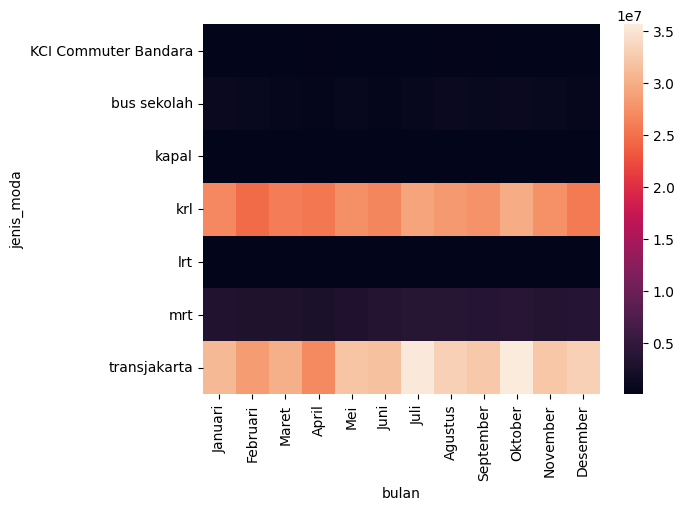

In [32]:
sns.heatmap(data)

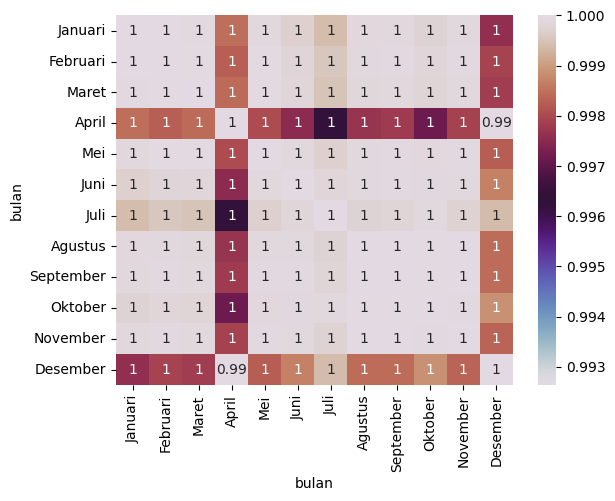

In [35]:
heatmap = sns.heatmap(data.corr(numeric_only=True, method='pearson'),
                      annot=True, cmap='twilight')
plt.show()

# **SECOND DATA (Population in Jakarta from 2020-2024)**

## Import Library

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Import Dataset

In [8]:
d2020 = pd.read_csv('/content/drive/MyDrive/test/Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Kabupaten_Kota di Provinsi DKI Jakarta, 2020.csv')
d2021 = pd.read_csv('/content/drive/MyDrive/test/Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Kabupaten_Kota di Provinsi DKI Jakarta, 2021.csv')
d2022 = pd.read_csv('/content/drive/MyDrive/test/Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Kabupaten_Kota di Provinsi DKI Jakarta, 2022.csv')
d2023 = pd.read_csv('/content/drive/MyDrive/test/Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Kabupaten_Kota di Provinsi DKI Jakarta, 2023.csv')
d2024 = pd.read_csv('/content/drive/MyDrive/test/Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Kabupaten_Kota di Provinsi DKI Jakarta, 2024.csv')

In [9]:
d2020

,Kabupaten/Kota,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
0,Kepulauan Seribu,27.8,2.69,0.26,2726,102.6
1,Kota Jakarta Selatan,2226.8,0.75,21.08,14430,101.6
2,Kota Jakarta Timur,3037.1,1.17,28.76,16624,101.5
3,Kota Jakarta Pusat,1056.9,1.53,10.01,20177,103.8
4,Kota Jakarta Barat,2434.5,0.63,23.05,19564,102.0
5,Kota Jakarta Utara,779.0,0.76,16.84,12708,102.7
6,DKI Jakarta,10562.1,0.92,100.00,15907,102.1


In [10]:
d2021

,Kabupaten/Kota,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
0,Kepulauan Seribu,28.2,2.24,0.27,2774,102.1
1,Kota Jakarta Selatan,2233.8,0.40,21.05,14475,101.1
2,Kota Jakarta Timur,3056.3,0.80,28.81,16729,101.0
3,Kota Jakarta Pusat,1066.5,1.14,10.05,20360,103.2
4,Kota Jakarta Barat,2440.1,0.29,23.00,19608,101.5
5,Kota Jakarta Utara,1784.8,0.41,16.82,12749,102.2
6,DKI Jakarta,10609.7,0.57,100.00,15978,101.5


In [11]:
d2022

,Kabupaten/Kota,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
0,Kepulauan Seribu,28.9,2.43,0.27,2841,101.9
1,Kota Jakarta Selatan,2244.6,0.48,21.02,14545,100.9
2,Kota Jakarta Timur,3083.9,0.90,28.87,16879,100.8
3,Kota Jakarta Pusat,1080.0,1.27,10.11,20618,103.1
4,Kota Jakarta Barat,2449.0,0.36,22.93,19680,101.3
5,Kota Jakarta Utara,1793.6,0.49,16.79,12812,102.0
6,DKI Jakarta,10680.0,0.66,10000.00,16084,101.4


In [12]:
d2023

,Kabupaten/Kota,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
0,Kepulauan Seribu,28.5,1.01,0.27,2659.0,100.6
1,Kota Jakarta Selatan,2235.6,0.14,20.95,15424.0,100.9
2,Kota Jakarta Timur,3079.6,0.51,28.86,16598.0,100.8
3,Kota Jakarta Pusat,1049.3,-0.26,9.83,22061.0,103.0
4,Kota Jakarta Barat,2470.1,0.53,23.14,19760.0,101.3
5,Kota Jakarta Utara,1809.0,0.61,16.95,12288.0,101.9
6,DKI Jakarta,10672.1,0.38,100.00,16146.0,101.3
7,NaN,NaN,NaN,NaN,NaN,NaN
8,Catatan,NaN,NaN,NaN,NaN,NaN
9,Hasil Proyeksi Penduduk Indonesia 2020–2050 Ha...,NaN,NaN,NaN,NaN,NaN


In [13]:
d2024

,Kabupaten/Kota,Jumlah Penduduk (Ribu),Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (Km2),Rasio Jenis Kelamin Penduduk
0,Kepulauan Seribu,28.8,1.00,0.27,3.0,100.0
1,Kota Jakarta Selatan,2230.7,0.05,20.88,15.0,100.7
2,Kota Jakarta Timur,3086.0,0.43,28.88,17.0,100.5
3,Kota Jakarta Pusat,1044.3,-0.32,9.77,22.0,102.7
4,Kota Jakarta Barat,2479.6,0.49,23.21,20.0,101.1
5,Kota Jakarta Utara,1815.6,0.54,16.99,12.0,101.7
6,DKI Jakarta,10684.9,0.31,100.00,16.0,101.1
7,NaN,NaN,NaN,NaN,NaN,NaN
8,Catatan,NaN,NaN,NaN,NaN,NaN
9,Hasil Proyeksi Penduduk Indonesia 2020–2050 Ha...,NaN,NaN,NaN,NaN,NaN


### Join Dataset

In [14]:
d2020.rename(columns={'Jumlah Penduduk (Ribu)': '2020'}, inplace=True)
d2021.rename(columns={'Jumlah Penduduk (Ribu)': '2021'}, inplace=True)
d2022.rename(columns={'Jumlah Penduduk (Ribu)': '2022'}, inplace=True)
d2023.rename(columns={'Jumlah Penduduk (Ribu)': '2023'}, inplace=True)
d2024.rename(columns={'Jumlah Penduduk (Ribu)': '2024'}, inplace=True)

In [15]:
d2020 = d2020[['Kabupaten/Kota', '2020']]
d2021 = d2021[['Kabupaten/Kota', '2021']]
d2022 = d2022[['Kabupaten/Kota', '2022']]
d2023 = d2023[['Kabupaten/Kota', '2023']]
d2024 = d2024[['Kabupaten/Kota', '2024']]

In [16]:
from functools import reduce
import pandas as pd

In [17]:
db = reduce(lambda left, right: pd.merge(left, right, on='Kabupaten/Kota', how='inner'),
            [d2020, d2021, d2022, d2023, d2024])
db

,Kabupaten/Kota,2020,2021,2022,2023,2024
0,Kepulauan Seribu,27.8,28.2,28.9,28.5,28.8
1,Kota Jakarta Selatan,2226.8,2233.8,2244.6,2235.6,2230.7
2,Kota Jakarta Timur,3037.1,3056.3,3083.9,3079.6,3086.0
3,Kota Jakarta Pusat,1056.9,1066.5,1080.0,1049.3,1044.3
4,Kota Jakarta Barat,2434.5,2440.1,2449.0,2470.1,2479.6
5,Kota Jakarta Utara,779.0,1784.8,1793.6,1809.0,1815.6
6,DKI Jakarta,10562.1,10609.7,10680.0,10672.1,10684.9


### Data Cleaning

In [18]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  7 non-null      object 
 1   2020            7 non-null      float64
 2   2021            7 non-null      float64
 3   2022            7 non-null      float64
 4   2023            7 non-null      float64
 5   2024            7 non-null      float64
dtypes: float64(5), object(1)
memory usage: 468.0+ bytes


Drop "DKI Jakarta" rows to avoid confusion ("DKI Jakarta means total in every year)

In [19]:
db = db.drop(db[db['Kabupaten/Kota'] == 'DKI Jakarta'].index)

In [20]:
db
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  6 non-null      object 
 1   2020            6 non-null      float64
 2   2021            6 non-null      float64
 3   2022            6 non-null      float64
 4   2023            6 non-null      float64
 5   2024            6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 420.0+ bytes


In [21]:
db = pd.melt(db, id_vars=['Kabupaten/Kota'], value_vars=['2020', '2021', '2022', '2023', '2024'],
                    var_name='Tahun', value_name='Populasi')
db

,Kabupaten/Kota,Tahun,Populasi
0,Kepulauan Seribu,2020,27.8
1,Kota Jakarta Selatan,2020,2226.8
2,Kota Jakarta Timur,2020,3037.1
3,Kota Jakarta Pusat,2020,1056.9
4,Kota Jakarta Barat,2020,2434.5
5,Kota Jakarta Utara,2020,779.0
6,Kepulauan Seribu,2021,28.2
7,Kota Jakarta Selatan,2021,2233.8
8,Kota Jakarta Timur,2021,3056.3
9,Kota Jakarta Pusat,2021,1066.5


In [22]:
db['Populasi'] = db['Populasi'] * 1000
db

,Kabupaten/Kota,Tahun,Populasi
0,Kepulauan Seribu,2020,27800.0
1,Kota Jakarta Selatan,2020,2226800.0
2,Kota Jakarta Timur,2020,3037100.0
3,Kota Jakarta Pusat,2020,1056900.0
4,Kota Jakarta Barat,2020,2434500.0
5,Kota Jakarta Utara,2020,779000.0
6,Kepulauan Seribu,2021,28200.0
7,Kota Jakarta Selatan,2021,2233800.0
8,Kota Jakarta Timur,2021,3056300.0
9,Kota Jakarta Pusat,2021,1066500.0


Data in 'Populasi' column should *1000 because at first the data was divided by 1000

### Inspect Data Information

In [37]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  30 non-null     object 
 1   Tahun           30 non-null     object 
 2   Populasi        30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 852.0+ bytes


In [38]:
db.isnull().sum()

,0
Kabupaten/Kota,0
Tahun,0
Populasi,0


Data already clean with 0 NULL and right Dtype

### Check For Duplicates

In [39]:
db.duplicated().sum()

np.int64(0)

The data doesn't have any duplicates

### Check For Outliers With Botplot

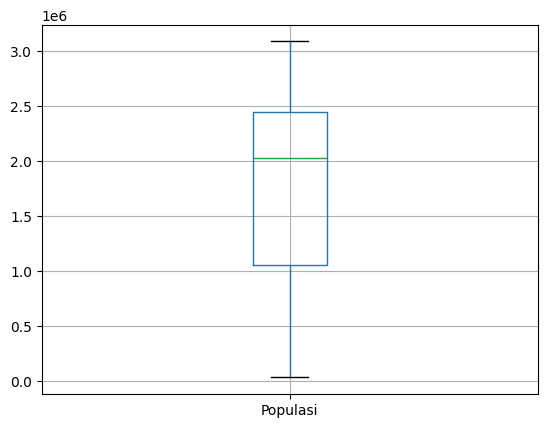

In [40]:
db.boxplot(column='Populasi')
plt.show()

The data doesn't has any 'outlier'. The majority of the population per city/district is within the normal range and is stable every year.

### Final Check

In [41]:
display(db)
db.info()

,Kabupaten/Kota,Tahun,Populasi
0,Kepulauan Seribu,2020,27800.0
1,Kota Jakarta Selatan,2020,2226800.0
2,Kota Jakarta Timur,2020,3037100.0
3,Kota Jakarta Pusat,2020,1056900.0
4,Kota Jakarta Barat,2020,2434500.0
5,Kota Jakarta Utara,2020,779000.0
6,Kepulauan Seribu,2021,28200.0
7,Kota Jakarta Selatan,2021,2233800.0
8,Kota Jakarta Timur,2021,3056300.0
9,Kota Jakarta Pusat,2021,1066500.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  30 non-null     object 
 1   Tahun           30 non-null     object 
 2   Populasi        30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 852.0+ bytes


### Summarize Data

Descriptive statistics for numerical data

In [42]:
db.describe()

,Populasi
count,3.000000e+01
mean,1.740297e+06
std,1.025661e+06
min,2.780000e+04
25%,1.051200e+06
50%,2.021200e+06
75%,2.446775e+06
max,3.086000e+06


Descriptive statistics for non-numerical data

In [43]:
db.describe(include='object')

,Kabupaten/Kota,Tahun
count,30,30
unique,6,5
top,Kepulauan Seribu,2020
freq,5,6


Count unique values in **Kabupaten/Kota**

In [44]:
db['Kabupaten/Kota'].value_counts()

,count
Kabupaten/Kota,
Kepulauan Seribu,5
Kota Jakarta Selatan,5
Kota Jakarta Timur,5
Kota Jakarta Pusat,5
Kota Jakarta Barat,5
Kota Jakarta Utara,5


### Export Data

In [46]:
db.to_csv('Jakarta_Population_From_2020_To_2024.csv', index=False)

In [ ]:
from google.colab import files
files.download('Jakarta_Population_From_2020_To_2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Exploratory Data Analysis**

### Bar Chart

In [45]:
population_per_year = pd.pivot_table(
    db,
    index=['Kabupaten/Kota', 'Tahun'],
    values=['Populasi'],
    aggfunc='sum'
)
population_per_year

Populasi
Kabupaten/Kota       Tahun           
Kepulauan Seribu     2020     27800.0
                     2021     28200.0
                     2022     28900.0
                     2023     28500.0
                     2024     28800.0
Kota Jakarta Barat   2020   2434500.0
                     2021   2440100.0
                     2022   2449000.0
                     2023   2470100.0
                     2024   2479600.0
Kota Jakarta Pusat   2020   1056900.0
                     2021   1066500.0
                     2022   1080000.0
                     2023   1049300.0
                     2024   1044300.0
Kota Jakarta Selatan 2020   2226800.0
                     2021   2233800.0
                     2022   2244600.0
                     2023   2235600.0
                     2024   2230700.0
Kota Jakarta Timur   2020   3037100.0
                     2021   3056300.0
                     2022   3083900.0
                     2023   3079600.0
                     2024   3086000.0
Kota Jakarta Utara   2020    779000.0
                     2021   1784800.0
                     2022   1793600.0
                     2023   1809000.0
                     2024   1815600.0

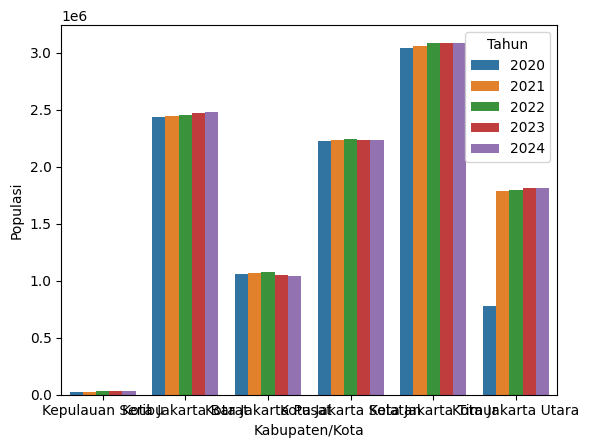

In [47]:
sns.barplot(data=population_per_year, x='Kabupaten/Kota', y='Populasi', hue= 'Tahun')
plt.show()

### Displot

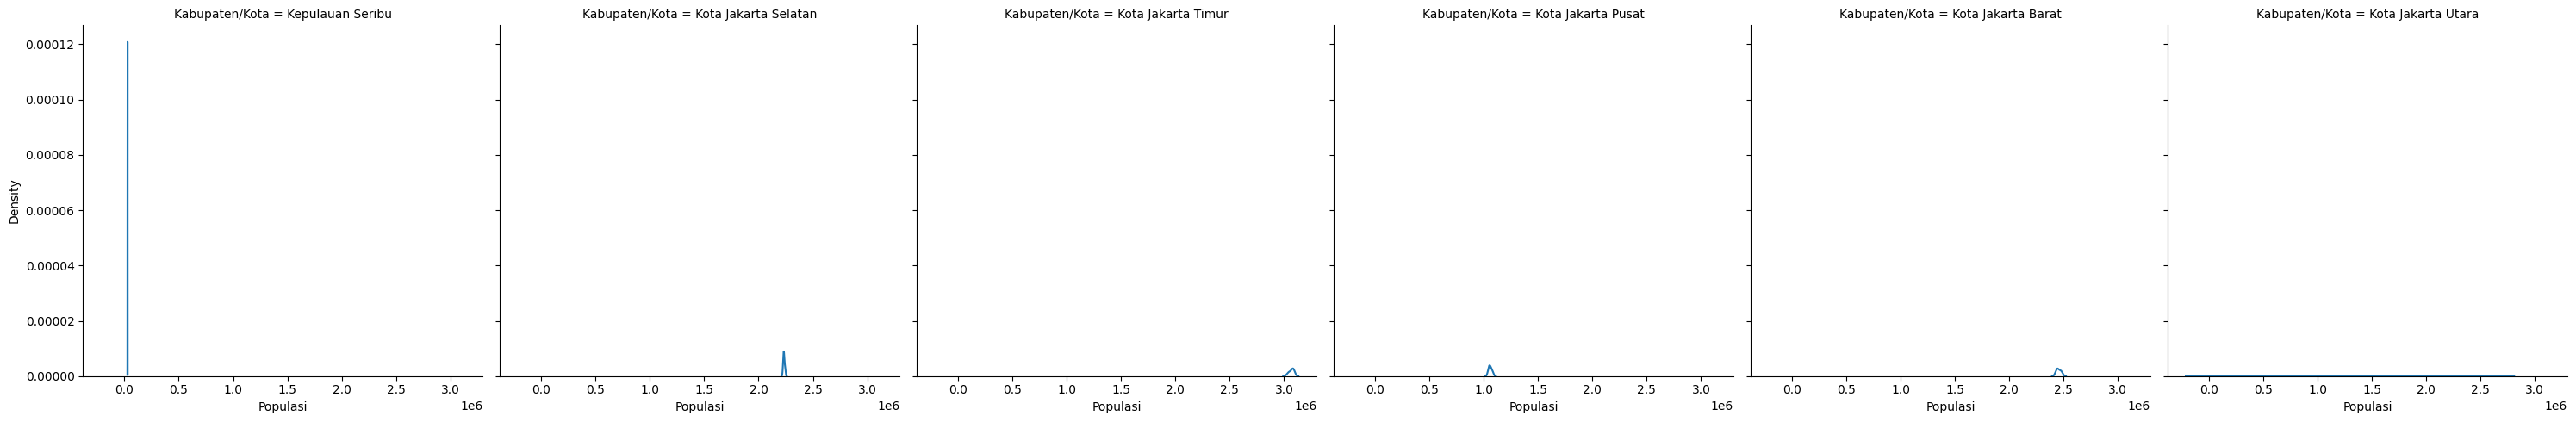

In [48]:
sns.displot(data = db, x= 'Populasi', col='Kabupaten/Kota', kind='kde')
plt.show()

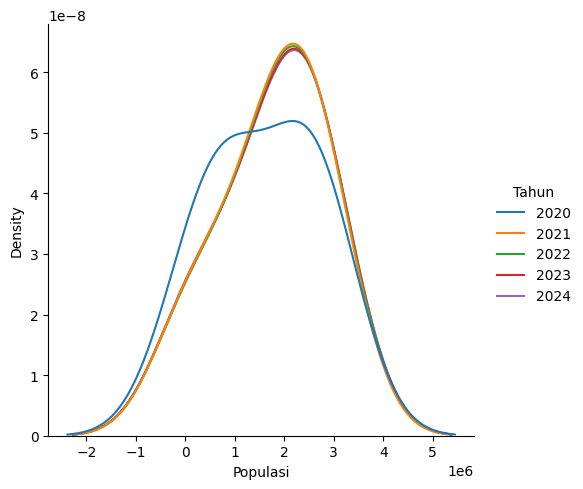

In [49]:
sns.displot(data = db, x='Populasi', hue='Tahun', kind='kde')
plt.show()

### Heat Map

In [50]:
datab = pd.pivot_table(
    data=db,
    index='Kabupaten/Kota',
    columns='Tahun',
    values='Populasi',
    aggfunc='sum'
)
datab

Tahun,2020,2021,2022,2023,2024
Kabupaten/Kota,,,,,
Kepulauan Seribu,27800.0,28200.0,28900.0,28500.0,28800.0
Kota Jakarta Barat,2434500.0,2440100.0,2449000.0,2470100.0,2479600.0
Kota Jakarta Pusat,1056900.0,1066500.0,1080000.0,1049300.0,1044300.0
Kota Jakarta Selatan,2226800.0,2233800.0,2244600.0,2235600.0,2230700.0
Kota Jakarta Timur,3037100.0,3056300.0,3083900.0,3079600.0,3086000.0
Kota Jakarta Utara,779000.0,1784800.0,1793600.0,1809000.0,1815600.0


<Axes: xlabel='Tahun', ylabel='Kabupaten/Kota'>

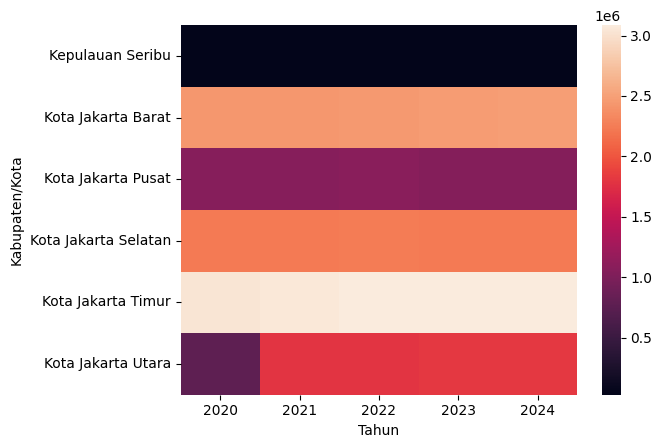

In [51]:
sns.heatmap(datab)

# **THIRD DATA (Traffic Level In Jakarta from 2020-2024)**

## **Import Library**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preparation**

### Import Dataset

In [26]:
ds = pd.read_excel ('/content/drive/MyDrive/test/tingkat_kemacetan_jakarta.xlsx')
ds

,tahun,persentase_kemacetan,rataan_waktu_tempuh_per_10_km,peringkat_global
0,2020,36,20.0,31
1,2021,34,19.5,46
2,2022,53,22.4,29
3,2023,53,23.2,30
4,2024,43,21.0,90


### Inspect Data Information

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tahun                          5 non-null      int64  
 1   persentase_kemacetan           5 non-null      int64  
 2   rataan_waktu_tempuh_per_10_km  5 non-null      float64
 3   peringkat_global               5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 292.0 bytes


In [29]:
ds.isnull().sum()

,0
tahun,0
persentase_kemacetan,0
rataan_waktu_tempuh_per_10_km,0
peringkat_global,0


### Data Cleaning

Change Dtype 'tahun' to object

In [30]:
ds['tahun'] = ds['tahun'].astype('object')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tahun                          5 non-null      object 
 1   persentase_kemacetan           5 non-null      int64  
 2   rataan_waktu_tempuh_per_10_km  5 non-null      float64
 3   peringkat_global               5 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 292.0+ bytes


### Check For Duplicates

In [ ]:
ds.duplicated().sum()

np.int64(0)

### Check Outliers With Botplot

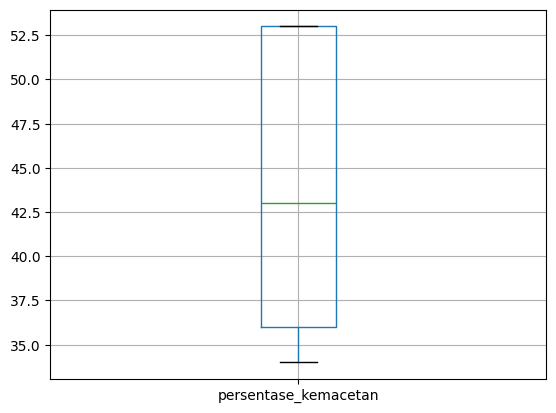

In [ ]:
ds.boxplot(column='persentase_kemacetan')
plt.show()

The data doesn't has any 'outlier'. The percentage of traffics are stable in 5 year period.

### Final Check

In [ ]:
display(ds)
ds.info()

,tahun,persentase_kemacetan,rataan_waktu_tempuh_per_10_km,peringkat_global
0,2020,36,20.0,31
1,2021,34,19.5,46
2,2022,53,22.4,29
3,2023,53,23.2,30
4,2024,43,21.0,90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tahun                          5 non-null      object 
 1   persentase_kemacetan           5 non-null      int64  
 2   rataan_waktu_tempuh_per_10_km  5 non-null      float64
 3   peringkat_global               5 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 292.0+ bytes


### Summarize Data

Descriptive statistics for numerical data

In [ ]:
ds.describe()

,persentase_kemacetan,rataan_waktu_tempuh_per_10_km,peringkat_global
count,5.000000,5.000000,5.00000
mean,43.800000,21.220000,45.20000
std,9.038805,1.565886,25.99423
min,34.000000,19.500000,29.00000
25%,36.000000,20.000000,30.00000
50%,43.000000,21.000000,31.00000
75%,53.000000,22.400000,46.00000
max,53.000000,23.200000,90.00000


Descriptive statistics for non-numerical data

In [ ]:
ds.describe(include='object')

,tahun
count,5
unique,5
top,2020
freq,1


Count unique values in **tahun**

In [ ]:
ds['tahun'].value_counts()

,count
tahun,
2020,1
2021,1
2022,1
2023,1
2024,1


### Export Data

In [ ]:
ds.to_csv('traffic_level_jakarta_2020_to_2024.csv', index=False)

In [ ]:
from google.colab import files
files.download('traffic_level_jakarta_2020_to_2024.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Exploratory Data Analysis**

### Bar Chart

In [ ]:
traffic_level_jakarta_2020_to_2024 = pd.pivot_table(
    ds,
    index=['tahun', 'rataan_waktu_tempuh_per_10_km'],
    values=['persentase_kemacetan'],
    aggfunc='sum'
)
traffic_level_jakarta_2020_to_2024

,,persentase_kemacetan
tahun,rataan_waktu_tempuh_per_10_km,
2020,20.0,36
2021,19.5,34
2022,22.4,53
2023,23.2,53
2024,21.0,43


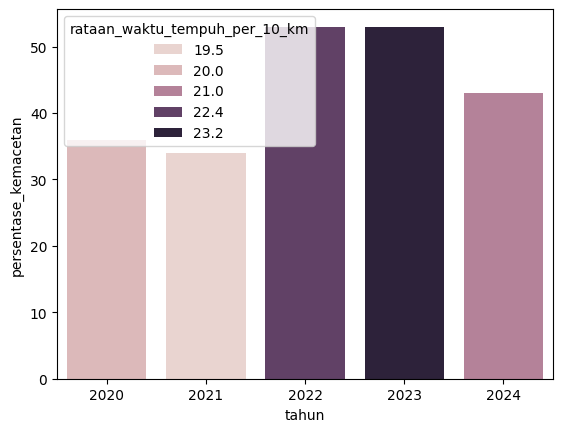

In [ ]:
sns.barplot(data=traffic_level_jakarta_2020_to_2024, x='tahun', y='persentase_kemacetan', hue= 'rataan_waktu_tempuh_per_10_km')
plt.show()

### Line Chart

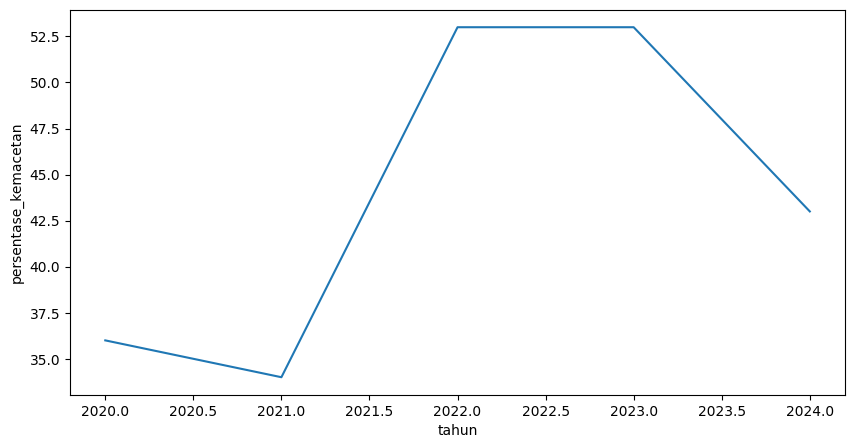

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=ds, x='tahun', y='persentase_kemacetan')
plt.show()

### Heatmap

In [ ]:
datacc = pd.pivot_table(
    data=ds,
    index='tahun',
    values='persentase_kemacetan',
    aggfunc='sum'
)
datacc

,persentase_kemacetan
tahun,
2020,36
2021,34
2022,53
2023,53
2024,43


<Axes: ylabel='tahun'>

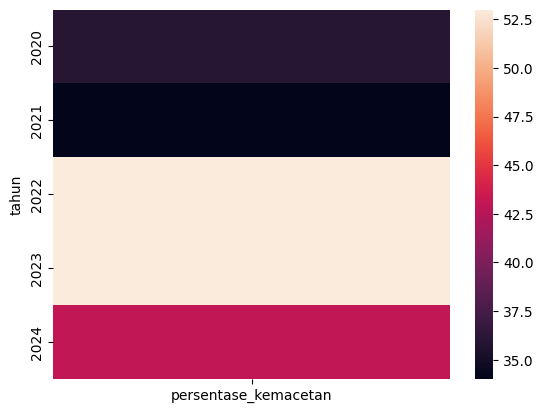

In [ ]:
sns.heatmap(datacc)